In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.category import UnitData

In [2]:
#load the business registration csv files 
df_2015_2016 = pd.read_csv("/home/okese/projects/oamk/Thesis/Data/2015_2016_Registrations.csv", encoding='latin-1')
df_2017 = pd.read_csv("/home/okese/projects/oamk/Thesis/Data/2017_Registrations.csv", encoding='latin-1')
df_2018_2019 = pd.read_csv("/home/okese/projects/oamk/Thesis/Data/2018_2019_Registrations.csv", encoding='latin-1')

df_2015_2016.rename(columns={"BUSINESS_NAME	":"BUSINESS_NAME", "BUSINESS TYPE":"BUSINESS_TYPE", "MONTH OF REGISTRATION":"MONTH_OF_REGISTRATION", "YEAR OF REGISTRATION":"REGISTRATION_YEAR", "NATURE_OF_BUSINESS":"NATURE_OF_BUSINESS"}, inplace=True)
df_2017.rename(columns={"BUSINESS NAME":"BUSINESS_NAME", "BUSINESS TYPE":"BUSINESS_TYPE", "Month OF REGISTRATION":"MONTH_OF_REGISTRATION", "YEAR OF REGISTRATION":"REGISTRATION_YEAR"}, inplace=True)
df_2018_2019.rename(columns={"BUSINESSNAME":"BUSINESS_NAME", "BUSINESSType":"BUSINESS_TYPE", "MONTHOFREGISTRATION":"MONTH_OF_REGISTRATION", "REGISTRATIONYEAR":"REGISTRATION_YEAR"}, inplace=True)

In [ ]:

df_2015_2016.head()
df_2017.head()
df_2018_2019.info()

In [3]:
df_2018_2019=df_2018_2019.dropna()
df_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112296 entries, 0 to 113502
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BUSINESS_NAME          112296 non-null  object 
 1   BUSINESS_TYPE          112296 non-null  object 
 2   MONTH_OF_REGISTRATION  112296 non-null  object 
 3   REGISTRATION_YEAR      112296 non-null  float64
 4   NATURE_OF_BUSINESS     112296 non-null  object 
 5   PRINCIPAL_ACTIVITY     112296 non-null  object 
 6   CITY                   112296 non-null  object 
 7   REGION                 112296 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.7+ MB


In [4]:
df_2018_2019["REGISTRATION_YEAR"] = df_2018_2019["REGISTRATION_YEAR"].astype(int)
df_2018_2019.head()

,BUSINESS_NAME,BUSINESS_TYPE,MONTH_OF_REGISTRATION,REGISTRATION_YEAR,NATURE_OF_BUSINESS,PRINCIPAL_ACTIVITY,CITY,REGION
0,QUAJOES ENTERPRISE,Sole Proprietor,Jan,2018,Commerce,1. SALE OF BUILDING MATERIALS 2. SERVICING OF ...,TARKWA,WESTERN
1,CHRYSTAMOD ENTERPRISE,Sole Proprietor,Jan,2018,General Trading,"1.GENERAL MERCHANT, 2.IMPORT AND EXPORT OF GEN...",ACCRA,GREATER ACCRA
2,AWO AKWAA ENTERPRISE,Sole Proprietor,Jan,2018,Services,"PRODUCTION OF PURE WATER, FRESH FRUIT AND GENE...",KADE,EASTERN
3,HOT-WIND BOUTIQUE AND TRADING ENTERPRISE,Sole Proprietor,Jan,2018,Others,1. MOBILE MONEY TRANSFER SERVICES 2. OPERATING...,ACCRA,GREATER ACCRA
4,L.A NASEDA ENTERPRISE,Sole Proprietor,Jan,2018,Commerce,"WHOLESALE AND RETAIL OF BUILDING MATERIALS , I...",ACCRA,GREATER ACCRA


In [5]:
df = df_2015_2016.append([df_2017,df_2018_2019], ignore_index=True)

/tmp/ipykernel_3375/4229212845.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_2015_2016.append([df_2017,df_2018_2019], ignore_index=True)


In [6]:
df.isnull().sum()

BUSINESS_NAME            0
BUSINESS_TYPE            0
MONTH_OF_REGISTRATION    0
REGISTRATION_YEAR        0
NATURE_OF_BUSINESS       0
PRINCIPAL_ACTIVITY       0
CITY                     3
REGION                   0
dtype: int64

In [ ]:
#save data as a csv file 
df.to_csv('2015_2019_business_registration.csv', index=False)

In [2]:
#load data from the saved csv 
df = pd.read_csv("2015_2019_business_registration.csv")

In [3]:
df.head()

,BUSINESS_NAME,BUSINESS_TYPE,MONTH_OF_REGISTRATION,REGISTRATION_YEAR,NATURE_OF_BUSINESS,PRINCIPAL_ACTIVITY,CITY,REGION
0,BNJ ENTERPRISE,Sole Proprietor,Jan,2015,Commerce,GENERAL TRADING,CAPE COAST,CENTRAL
1,SAMMIOUS STAR ENTERPRISE,Sole Proprietor,Jan,2015,Commerce,DEALER IN GENERAL GOODS,ACCRA-BORTIANOR,GREATER ACCRA
2,ADEPA REFURBISHMENT SERVICES,Sole Proprietor,Jan,2015,Services,"PAINTING, TILING, ROOF CHANGE, CIVIL REPAIR WO...",ACCRA,GREATER ACCRA
3,BLESSED CONNIJEI,Sole Proprietor,Jan,2015,Services,"GENERAL TRADING, IMPORT & EXPORT OF GENERAL GOODS",KUMASI,ASHANTI
4,NELDEE ENTERPRISE,Sole Proprietor,Jan,2015,Services,TRADING IN GENERAL GOODS,ACCRA,GREATER ACCRA


In [6]:
df.BUSINESS_TYPE.value_counts()

Sole Proprietor                 214199
Company Limited By Shares        89481
Company Limited By Guarantee     26738
Subsidiary Business Name          1849
Partnership                       1015
Subsidiary Business Name           867
External Company                   637
Name: BUSINESS_TYPE, dtype: int64

In [5]:
df['BUSINESS_TYPE'] = df['BUSINESS_TYPE'].apply(
    lambda x: 'Company Limited By Shares' if 'Shares' in x else (
        'Company Limited By Guarantee' if 'Guarantee' in x else x
    )
)

print(df)

                            BUSINESS_NAME             BUSINESS_TYPE  \
0                          BNJ ENTERPRISE           Sole Proprietor   
1                SAMMIOUS STAR ENTERPRISE           Sole Proprietor   
2            ADEPA REFURBISHMENT SERVICES           Sole Proprietor   
3                        BLESSED CONNIJEI           Sole Proprietor   
4                       NELDEE ENTERPRISE           Sole Proprietor   
...                                   ...                       ...   
334781         WORLD EYE TRAVEL AND TOURS  Subsidiary Business Name   
334782                             GITFIC  Subsidiary Business Name   
334783                      SAS ENGINEERS  Subsidiary Business Name   
334784                     AKATE FEEDMILL  Subsidiary Business Name   
334785  EAST AIRPORT INTERNATIONAL SCHOOL  Subsidiary Business Name   

       MONTH_OF_REGISTRATION  REGISTRATION_YEAR  \
0                        Jan               2015   
1                        Jan               20

In [7]:
df['QUARTER'] = df['MONTH_OF_REGISTRATION'].map(lambda x: 'Q1' if 'Jan' in x else 'Q1' if 'Feb' in x else 'Q1' if 'Mar' in x else  'Q2' if 'Apr' in x else 'Q2' if 'May' in x else 'Q2' if 'Jun' in x else 'Q3' if 'Jul' in x else 'Q3' if 'Aug' in x else 'Q3' if 'Sep' in x else 'Q4' if 'Oct' in x else 'Q4' if 'Nov' in x else 'Q4' if 'Dec' in x else '')

In [8]:
df["QUARTER_YEAR"]= df['QUARTER'] + ' ' +df['REGISTRATION_YEAR'].astype(str)

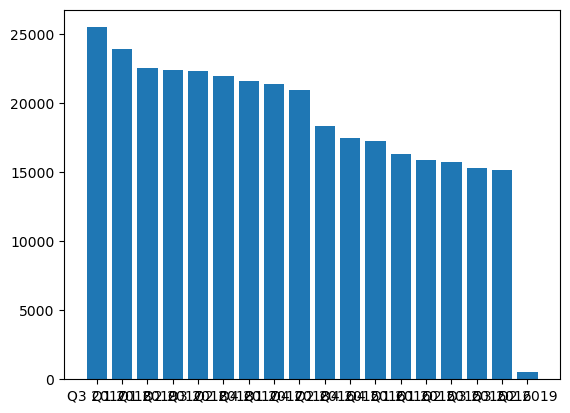

In [9]:
regYear = df["QUARTER_YEAR"].value_counts()
regYear
fig = plt.bar(regYear.index, regYear.values)

Text(0.5, 1.0, 'Quarterly Business Registration in Ghana')

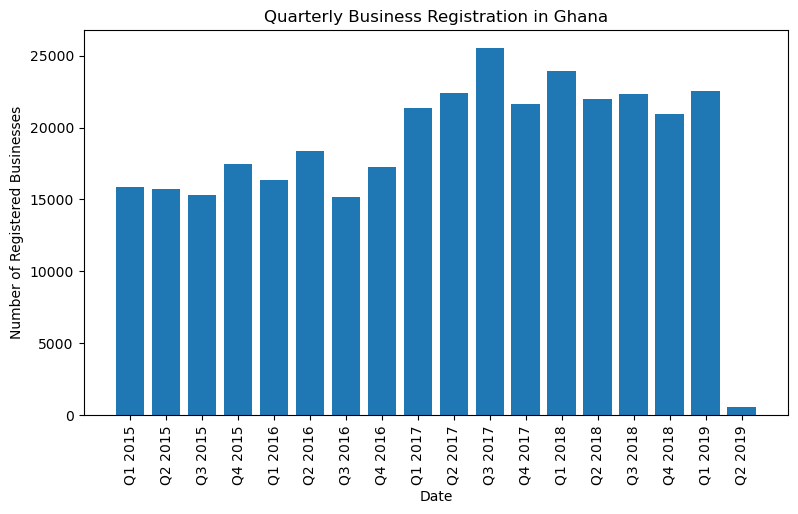

In [26]:
quart_list = ['Q1 2015','Q2 2015','Q3 2015','Q4 2015','Q1 2016','Q2 2016','Q3 2016','Q4 2016','Q1 2017','Q2 2017','Q3 2017','Q4 2017','Q1 2018','Q2 2018','Q3 2018','Q4 2018','Q1 2019']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(df.QUARTER_YEAR.value_counts().index, df.QUARTER_YEAR.value_counts().values, xunits=UnitData(quart_list))
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of Registered Businesses")
plt.title ("Quarterly Business Registration in Ghana")

Text(0, 0.5, 'Registrations')

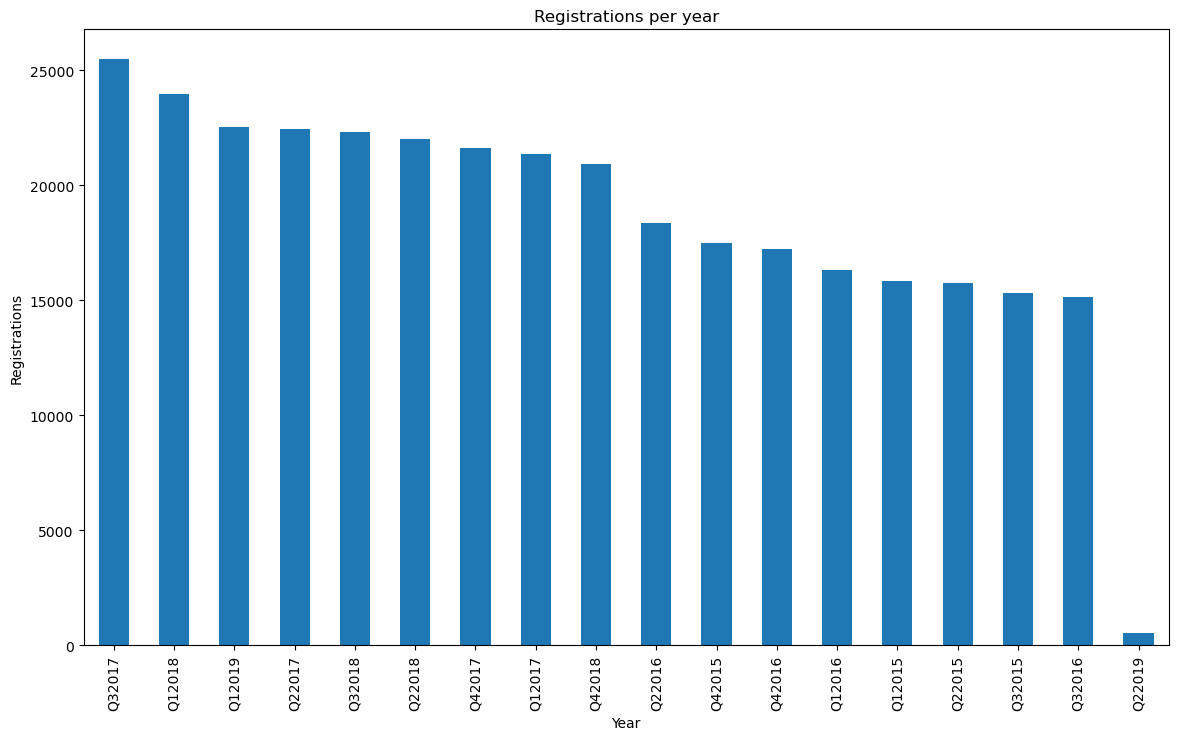

In [21]:

ax = df['QUARTER_YEAR'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Registrations per year")
ax.set_xlabel("Year")
ax.set_ylabel("Registrations")

Text(0, 0.5, 'frequency')

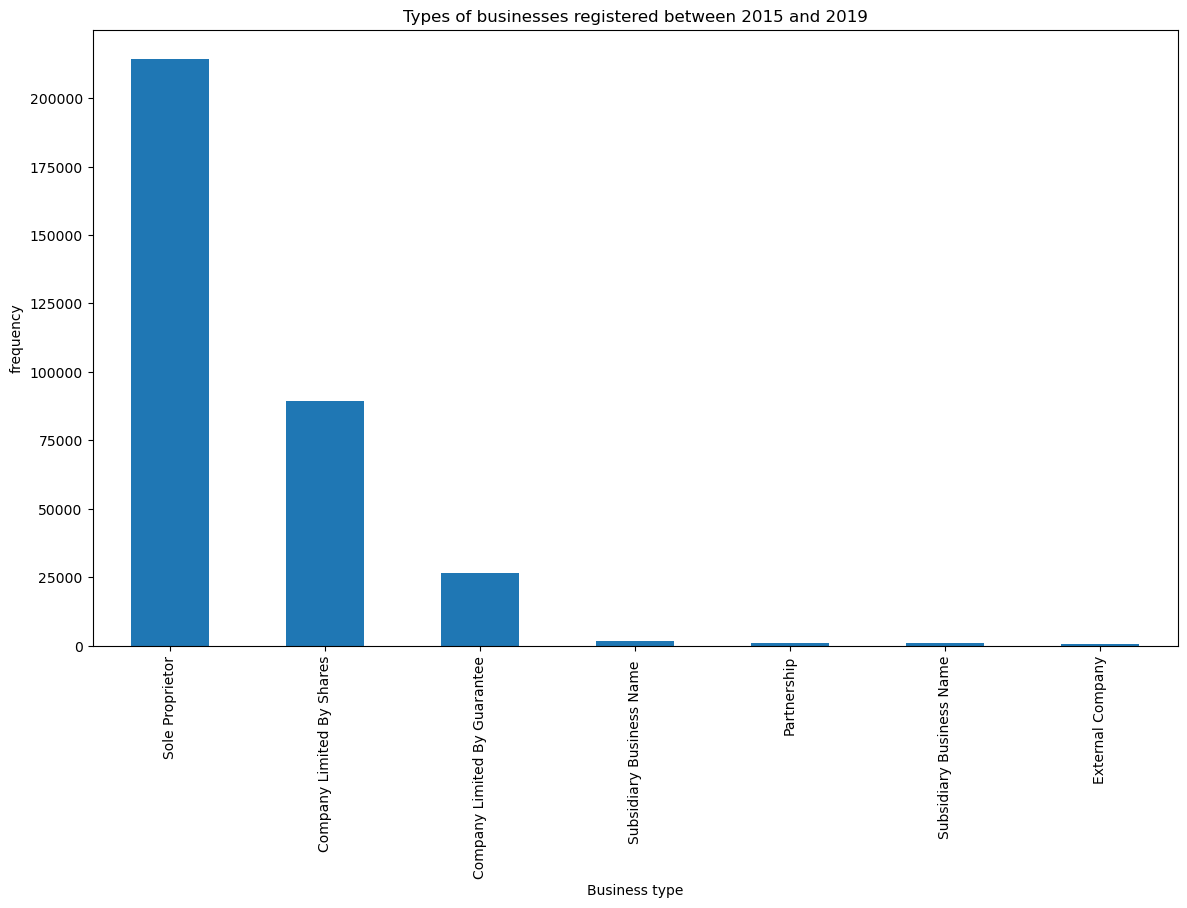

In [10]:
ax = df['BUSINESS_TYPE'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Types of businesses registered between 2015 and 2019")
ax.set_xlabel("Business type")
ax.set_ylabel("frequency")

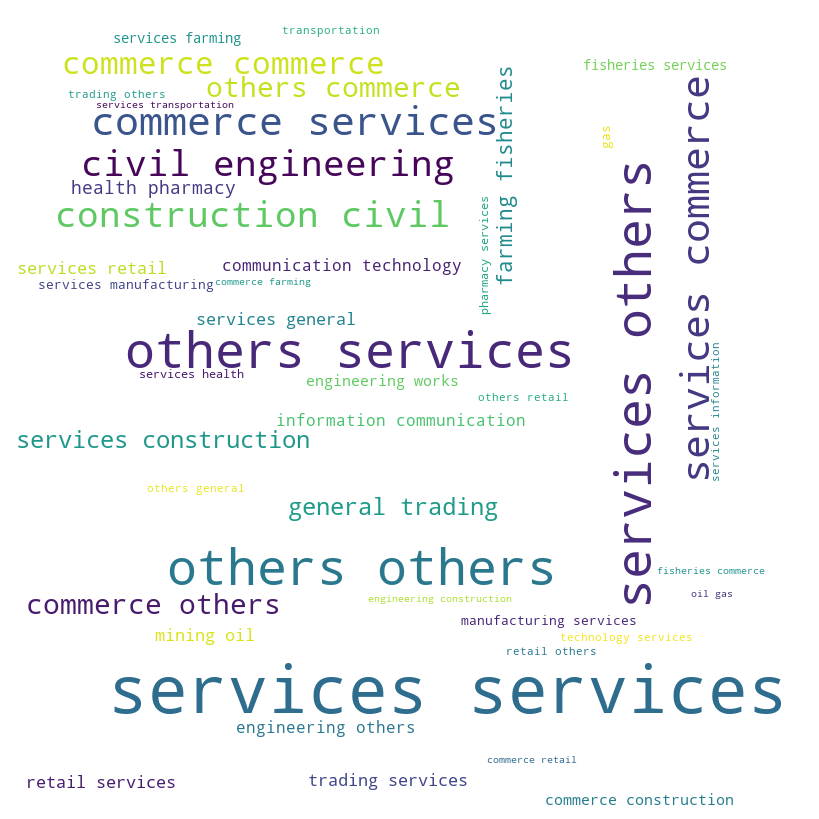

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.NATURE_OF_BUSINESS:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()